3D-style professional visualizations

Cleaned data loaded successfully!



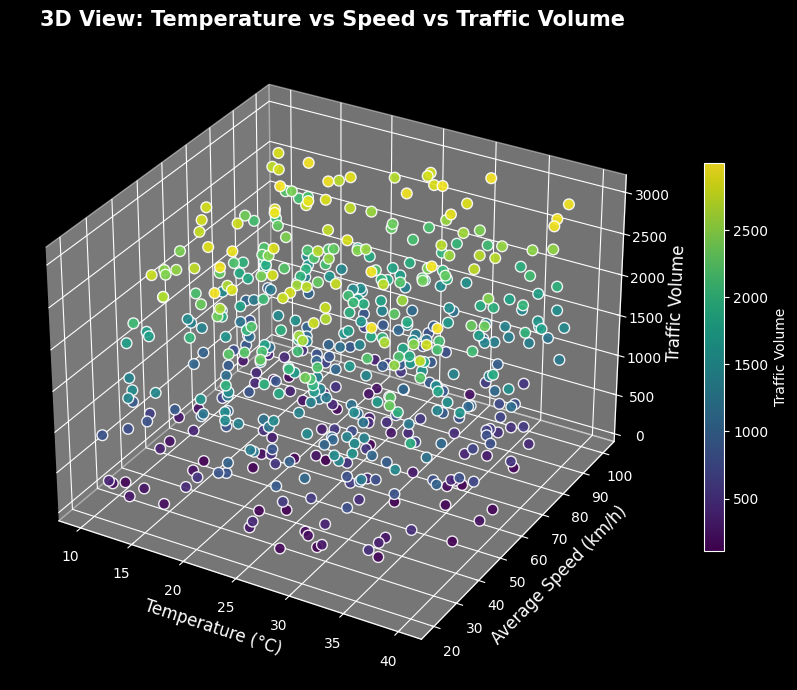

In [1]:
# Smart City 3D Visualization Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use("dark_background")

# Load cleaned data
df = pd.read_csv("cleaned_smart_city_traffic_data.csv")
print("Cleaned data loaded successfully!\n")

# Prepare numeric data
X = df['Temperature']
Y = df['Average_Speed']
Z = df['Traffic_Volume']

# Create figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a colorful 3D scatter
scatter = ax.scatter(
    X, Y, Z,
    c=Z, cmap='viridis', s=60, alpha=0.9, edgecolor='white'
)

# Add colorbar & labels
fig.colorbar(scatter, ax=ax, shrink=0.6, label='Traffic Volume')
ax.set_title("3D View: Temperature vs Speed vs Traffic Volume", fontsize=15, fontweight='bold', color='white')
ax.set_xlabel("Temperature (°C)", fontsize=12)
ax.set_ylabel("Average Speed (km/h)", fontsize=12)
ax.set_zlabel("Traffic Volume", fontsize=12)

plt.tight_layout()
plt.savefig("3D 1.png")
plt.show()


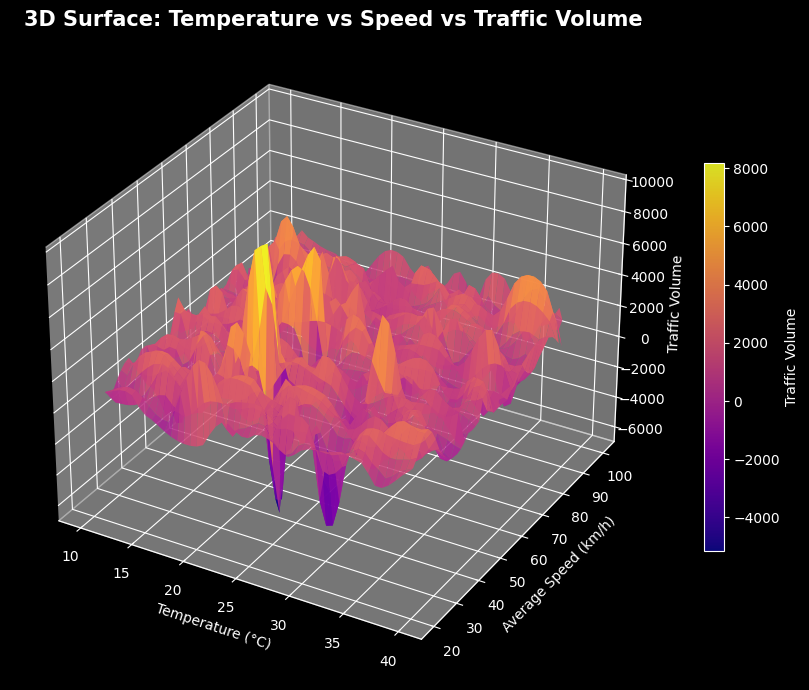

In [2]:
from scipy.interpolate import griddata

# Prepare grid
xi = np.linspace(X.min(), X.max(), 50)
yi = np.linspace(Y.min(), Y.max(), 50)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((X, Y), Z, (Xi, Yi), method='cubic')

# 3D surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xi, Yi, Zi, cmap='plasma', edgecolor='none', alpha=0.9)

fig.colorbar(surf, ax=ax, shrink=0.6, label='Traffic Volume')
ax.set_title("3D Surface: Temperature vs Speed vs Traffic Volume", fontsize=15, fontweight='bold')
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Average Speed (km/h)")
ax.set_zlabel("Traffic Volume")
plt.tight_layout()
plt.savefig("3D 2.png")
plt.show()


Data Loaded Successfully — Ready for 3D Magic!



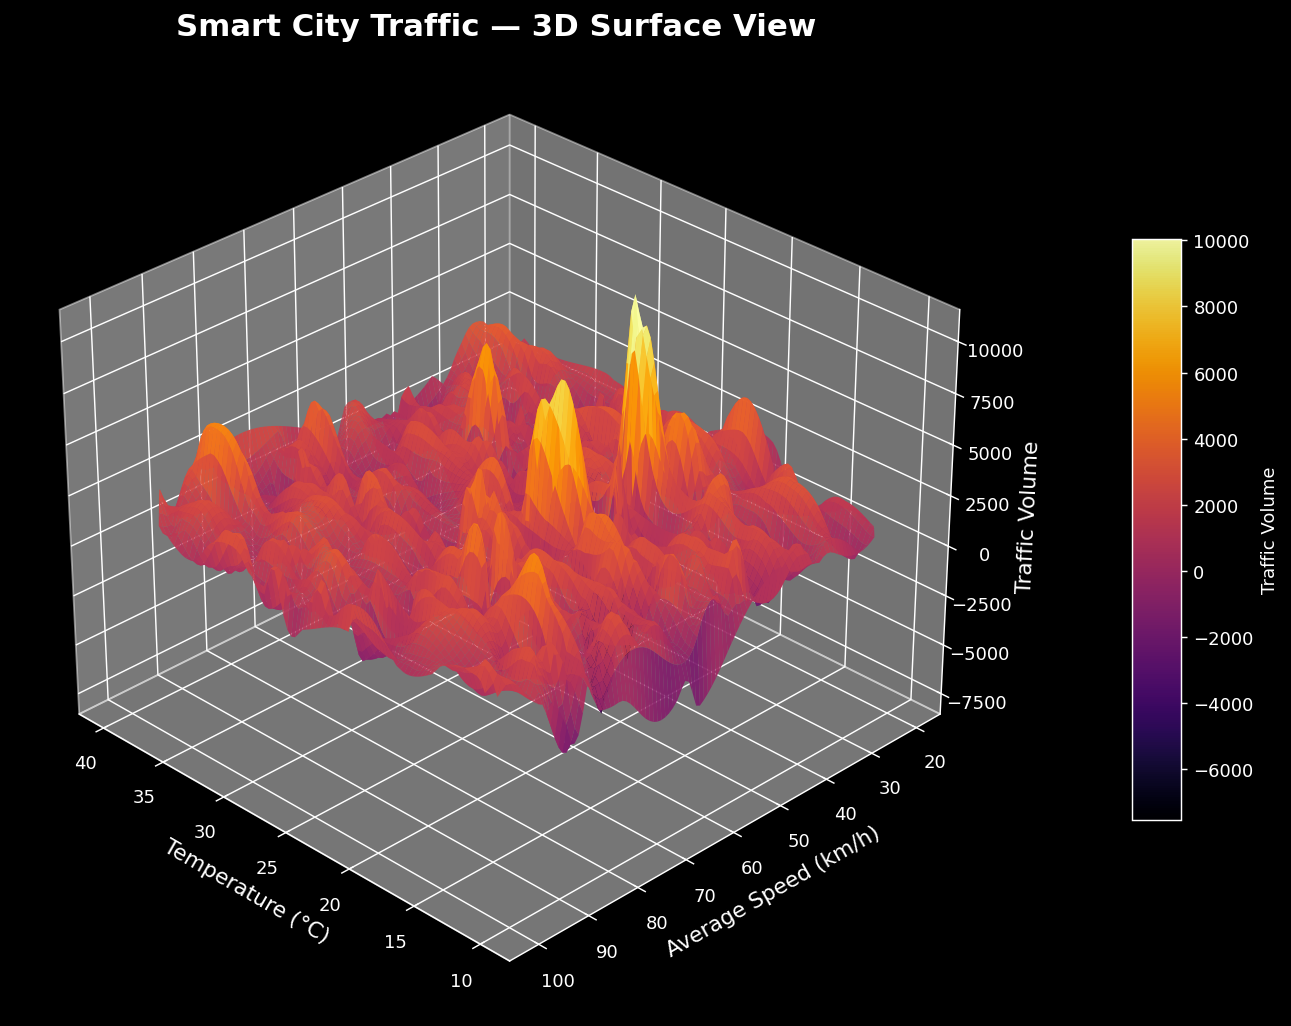

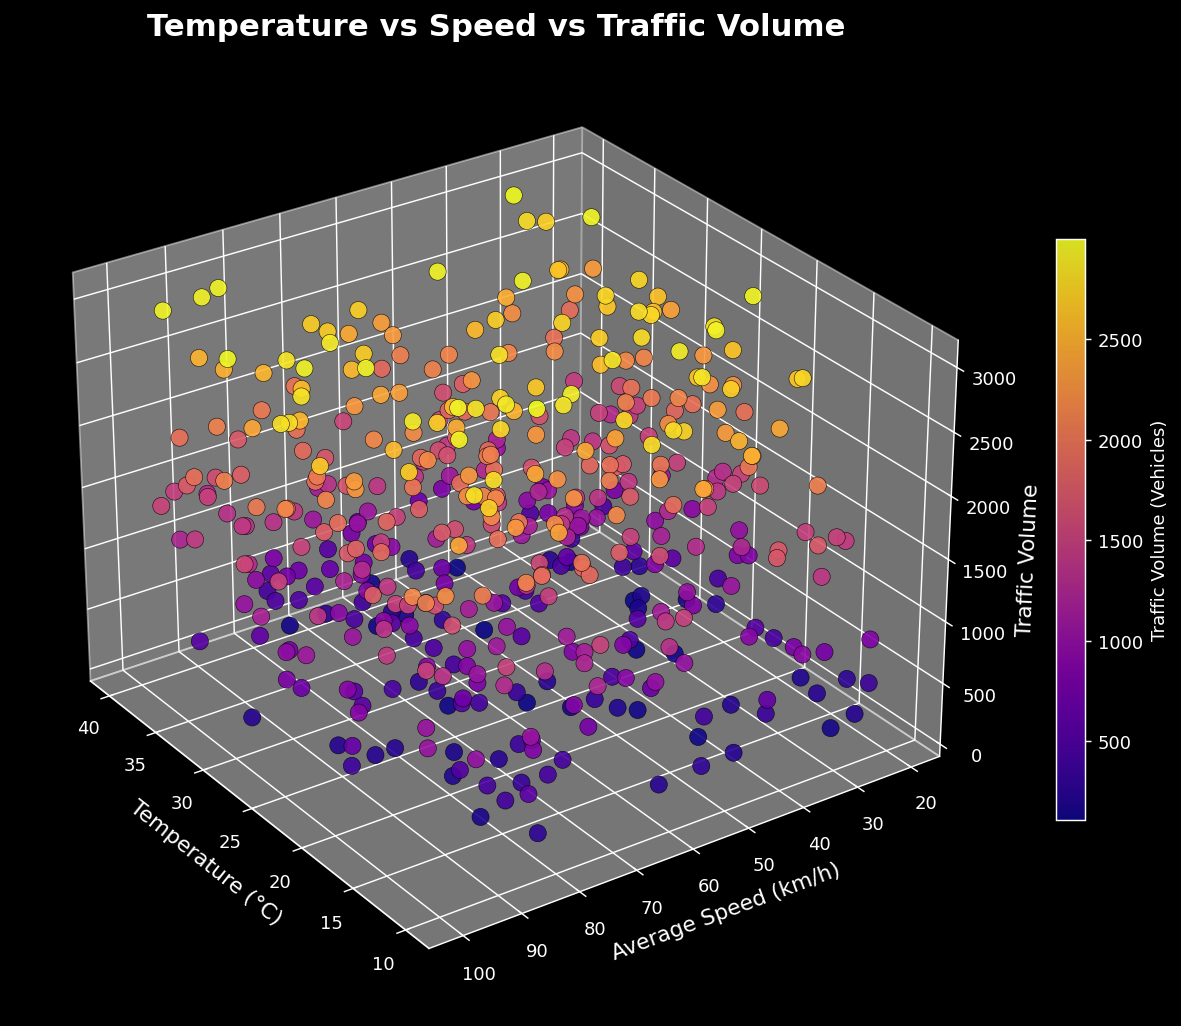

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1764,) and arg 5 with shape (42,).

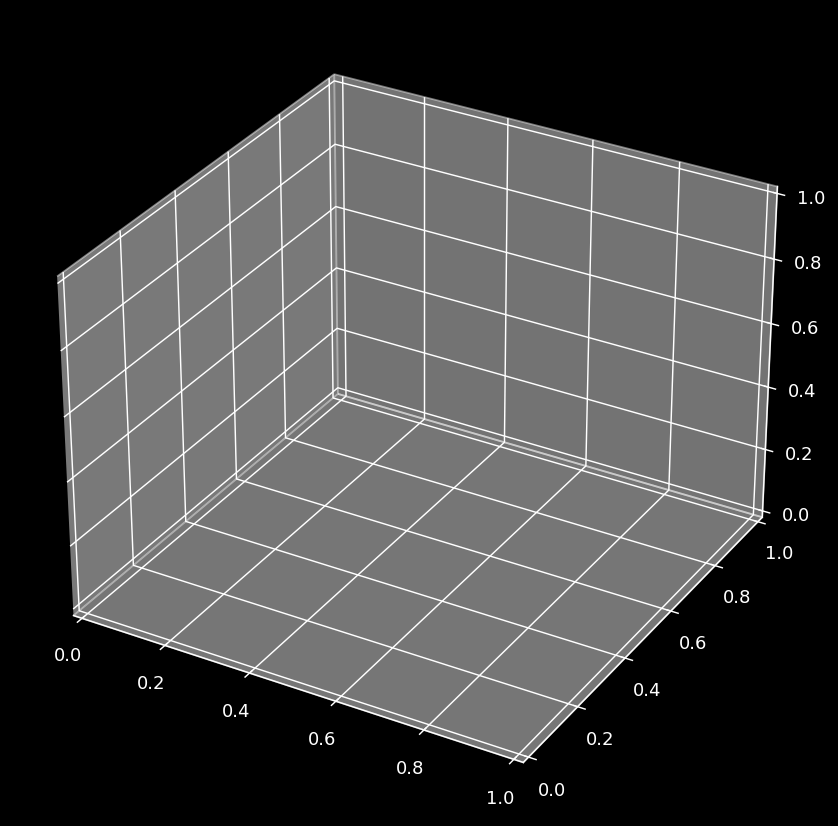

In [13]:
# Smart City Traffic 3D Master Visualization (Ultra HD)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use("dark_background")

# Load Cleaned Data
df = pd.read_csv("cleaned_smart_city_traffic_data.csv")
print("Data Loaded Successfully — Ready for 3D Magic!\n")

# Extract Variables
X = df['Temperature']
Y = df['Average_Speed']
Z = df['Traffic_Volume']

# ---------------------------------------------------------------------
# ULTRA SMOOTH 3D SURFACE (High Detail)
# ---------------------------------------------------------------------
fig = plt.figure(figsize=(12, 8), dpi=130)
ax = fig.add_subplot(111, projection='3d')

# Create grid for interpolation
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((X, Y), Z, (Xi, Yi), method='cubic')

# Smooth 3D surface with glow effect
surf = ax.plot_surface(
    Xi, Yi, Zi,
    cmap=cm.inferno,    # ich dark–orange theme
    linewidth=0,
    antialiased=True,
    alpha=0.95,
    rstride=1,
    cstride=1
)

# Lighting & colorbar
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, pad=0.1, label="Traffic Volume", cmap="inferno")

ax.set_title("Smart City Traffic — 3D Surface View", fontsize=17, fontweight='bold', color='white')
ax.set_xlabel("Temperature (°C)", fontsize=12)
ax.set_ylabel("Average Speed (km/h)", fontsize=12)
ax.set_zlabel("Traffic Volume", fontsize=12)

ax.view_init(elev=30, azim=135)  # Custom camera angle
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 3D SCATTER (Glowing Spheres)
# ---------------------------------------------------------------------
fig = plt.figure(figsize=(12, 8), dpi=130)
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X, Y, Z,
    c=Z, cmap="plasma",
    s=90, alpha=0.9, edgecolor='black', linewidth=0.3
)

fig.colorbar(scatter, ax=ax, shrink=0.6, label='Traffic Volume (Vehicles)')
ax.set_title("Temperature vs Speed vs Traffic Volume", fontsize=17, fontweight='bold', color='white')
ax.set_xlabel("Temperature (°C)", fontsize=12)
ax.set_ylabel("Average Speed (km/h)", fontsize=12)
ax.set_zlabel("Traffic Volume", fontsize=12)

ax.grid(True, linestyle=":", alpha=0.4)
ax.view_init(elev=28, azim=145)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 3D BAR CHART (City Overview)
# ---------------------------------------------------------------------
grouped = df.groupby(['Day_of_Week', 'Location'])['Traffic_Volume'].mean().reset_index()

# Convert categories to numbers
days = grouped['Day_of_Week'].astype('category').cat.codes
locs = grouped['Location'].astype('category').cat.codes

x, y = np.meshgrid(days, locs)
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)
dx = dy = 0.4
dz = grouped['Traffic_Volume'][:len(x)]

# Dark neon 3D bar
fig = plt.figure(figsize=(13, 8), dpi=130)
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.cividis(np.linspace(0.1, 1, len(x)))

ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True)

ax.set_title("3D View: Avg Traffic Volume by Day & Location", fontsize=17, fontweight='bold')
ax.set_xlabel("Day of Week", fontsize=12)
ax.set_ylabel("Location", fontsize=12)
ax.set_zlabel("Avg Traffic Volume", fontsize=12)
ax.view_init(elev=28, azim=120)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# BONUS — 3D CONTOUR (for artistic visual)
# ---------------------------------------------------------------------
fig = plt.figure(figsize=(12, 8), dpi=130)
ax = fig.add_subplot(111, projection='3d')

contour = ax.contour3D(Xi, Yi, Zi, 50, cmap='plasma', alpha=0.85)
fig.colorbar(contour, ax=ax, shrink=0.6, pad=0.1, label='Traffic Volume')

ax.set_title("3D Contour — Flow of Traffic Volume", fontsize=17, fontweight='bold', color='white')
ax.set_xlabel("Temperature (°C)", fontsize=12)
ax.set_ylabel("Average Speed (km/h)", fontsize=12)
ax.set_zlabel("Traffic Volume", fontsize=12)
ax.view_init(elev=35, azim=135)

plt.tight_layout()
plt.show()

print("All HD 3D Visualizations Rendered Successfully — This is your BOOM version! 🚀")


Creating fixed & beautiful 3D bar chart...


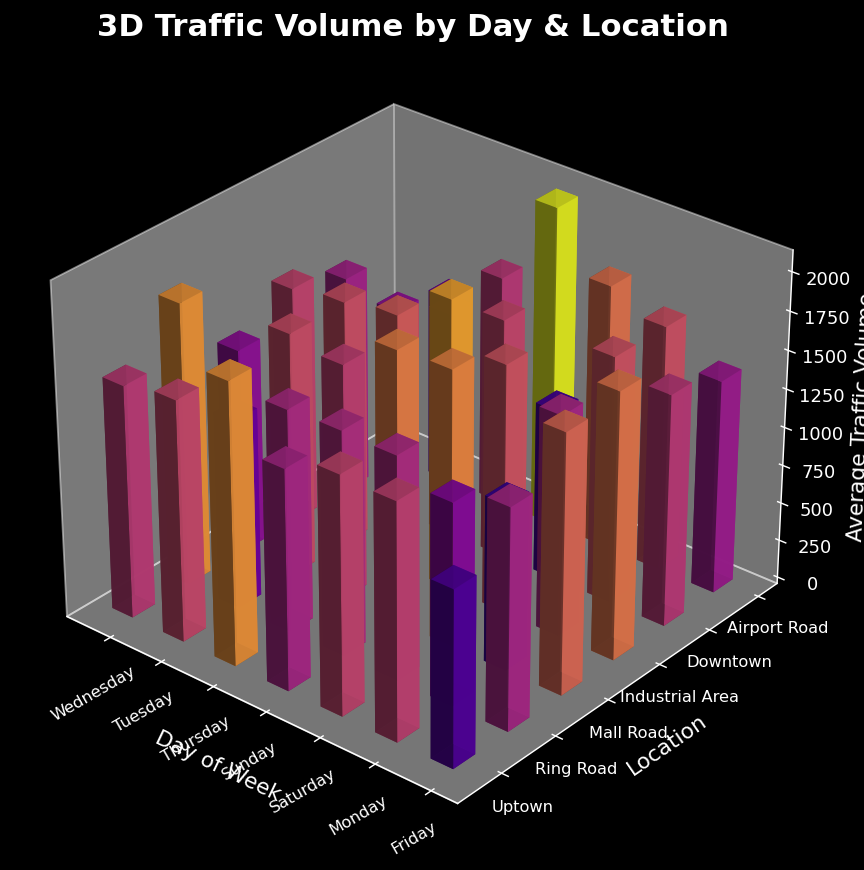

3D Bar Chart Rendered Perfectly!


In [3]:
# 3D BAR CHART — Smart City Traffic Overview
from matplotlib import cm

print("Creating fixed & beautiful 3D bar chart...")

# Average traffic by day & location
grouped = df.groupby(['Day_of_Week', 'Location'])['Traffic_Volume'].mean().reset_index()

# Encode categorical columns as numeric
grouped['Day_Code'] = grouped['Day_of_Week'].astype('category').cat.codes
grouped['Loc_Code'] = grouped['Location'].astype('category').cat.codes

# Prepare bar positions
x = grouped['Day_Code']
y = grouped['Loc_Code']
z = np.zeros(len(grouped))
dx = dy = 0.4
dz = grouped['Traffic_Volume']

# Build color gradient
colors = cm.plasma((dz - dz.min()) / (dz.max() - dz.min()))

# Create the 3D figure
fig = plt.figure(figsize=(13, 8), dpi=130)
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True, alpha=0.9)

# Add labels for categories
day_labels = grouped['Day_of_Week'].unique()
loc_labels = grouped['Location'].unique()
ax.set_xticks(np.arange(len(day_labels)))
ax.set_xticklabels(day_labels, rotation=30, fontsize=9)
ax.set_yticks(np.arange(len(loc_labels)))
ax.set_yticklabels(loc_labels, fontsize=9)

# Style the plot
ax.set_title("3D Traffic Volume by Day & Location", fontsize=17, fontweight='bold', color='white')
ax.set_xlabel("Day of Week", fontsize=12)
ax.set_ylabel("Location", fontsize=12)
ax.set_zlabel("Average Traffic Volume", fontsize=12)
ax.view_init(elev=30, azim=130)
ax.grid(False)

plt.tight_layout()
plt.savefig("3D 3.png")
plt.show()

print("3D Bar Chart Rendered Perfectly!")
